In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
name = 'name'
geoCoord = 'geoCoord'
coordination_source  = coordination_source.split('\n')
coordination_source = [el for el in coordination_source if not el.startswith('//')]
coordination_source = '\n'.join(coordination_source)
city_info = eval('[' + coordination_source.strip() + ']')

In [3]:
city_info = {dic['name']: dic['geoCoord'] for dic in city_info}

In [99]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [100]:
def get_distance(city_from, city_to):
    return geo_distance(city_info[city_from], city_info[city_to])

In [101]:
get_distance('北京', '上海')

727.52769688981

In [102]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

In [103]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

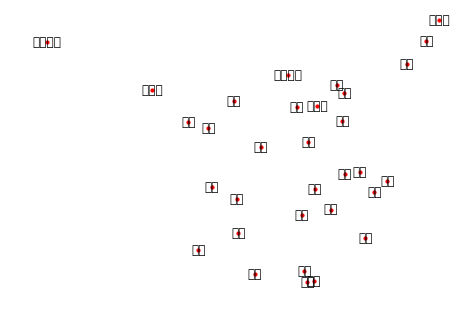

In [104]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [105]:
def get_threshold_city(city_info):
    threshold = 700
    cities = city_info.keys()
    return_dict = {}
    for c1 in cities:
        return_dict[c1] = [c for c in cities if c != c1 and get_distance(c, c1) < threshold]
    return return_dict

In [106]:
threshold_city = get_threshold_city(city_info)

In [107]:
graph = nx.Graph(threshold_city)
graph.add_nodes_from(city_info)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


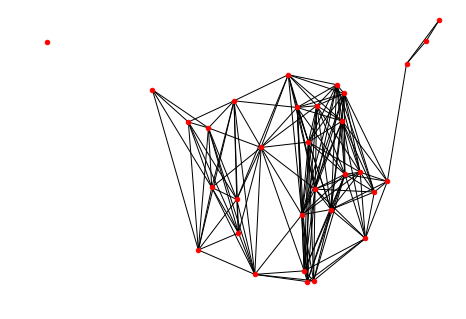

In [108]:
nx.draw(graph, city_info, with_labels=0, node_size=20)

In [109]:
def search(graph, start, distination, search_method):
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        for city in threshold_city[path[-1]]:
            if city in path:
                continue
            pathes.append(path + [city])
        pathes = search_method(pathes)
        if pathes and pathes[0][-1] == distination:
            return pathes[0]

In [110]:
search(graph, '北京', '上海', lambda x: x)

['北京', '济南', '上海']

In [111]:
def calculate_distance(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += get_distance(path[i], path[i + 1])
    return distance

In [112]:
def search_method_1(pathes):
    return sorted(pathes, key=lambda x: calculate_distance(x))

In [113]:
calculate_distance(['北京', '济南', '上海'])

752.66259009181

In [114]:
search(graph, '北京', '上海', search_method_1)

['北京', '天津', '上海']

In [115]:
calculate_distance(['北京', '天津', '上海'])

732.5085345714293

In [116]:
from sklearn.datasets import load_boston
import random

In [117]:
dataset = load_boston()

In [118]:
x, y = dataset['data'], dataset['target']
X, Y = x, y

In [119]:
x.shape

(506, 13)

In [120]:
y.shape

(506,)

In [121]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

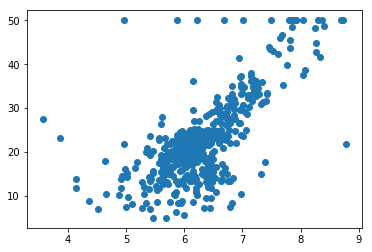

In [122]:
plt.scatter(x[:,5], y)

In [123]:
def price(rm, k, b):
    return rm * k + b

In [255]:
def loss(y, y_hat):
    assert len(y) == len(y_hat)
    return sum((y - y_hat) ** 2) / len(y)

In [125]:
def partial_derivative_k(y, y_hat, x):
    assert len(y) == len(y_hat) == len(x)
    return -2 / len(y) * sum([(y_i - y_hat_i) * x_i for y_i, y_hat_i, x_i in zip(list(y), list(y_hat), list(x))])

In [126]:
def partial_derivative_b(y, y_hat):
    assert len(y)== len(y_hat)
    return -2 / len(y) * sum([a - b for a, b in zip(list(y), list(y_hat))])

In [127]:
# define partial derivative 
def k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def b(y, y_hat):
    n = len(y)
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [128]:
y = [1,2,3,4,5]
y_hat = [1.1,2.3,3.5,4.7,5.9]
x = [1,0,3,0,5]


In [129]:
partial_derivative_k(y, y_hat, x)


2.440000000000001

In [130]:
k(x, y, y_hat)

2.440000000000001

In [131]:
partial_derivative_b(y, y_hat)

1.0000000000000002

In [132]:
b(y, y_hat)

1.0000000000000002

In [142]:
x, y = X[:, 5], Y

In [143]:
import random
import numpy as np

In [184]:
k = random.random() * 200 - 100
b = random.random() * 200 - 100
lr = 1e-4
iteration = 1000
loss_list = []
for i in range(iteration):
    y_hat = [price(x_i, k, b) for x_i in x]
    
    loss_list.append(loss(y, y_hat))
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,loss(y, y_hat),k,b))
    
    k_gradient = partial_derivative_k(y, y_hat, x)
    b_gradient = partial_derivative_b(y, y_hat)
    k += -lr * k_gradient
    b += -lr * b_gradient

Iteration 0, the loss is 4606.980655384346, parameters k is 4.034833451571245 and b is -70.28373826215966
Iteration 1, the loss is 4532.721268155293, parameters k is 4.1201239213265906 and b is -70.27024644385381
Iteration 2, the loss is 4459.674071840604, parameters k is 4.204715291196835 and b is -70.25686452779544
Iteration 3, the loss is 4387.819278932994, parameters k is 4.288613290627514 and b is -70.24359161328668
Iteration 4, the loss is 4317.137424931606, parameters k is 4.371823602108719 and b is -70.23042680701127
Iteration 5, the loss is 4247.6093630692985, parameters k is 4.454351861559922 and b is -70.2173692229741
Iteration 6, the loss is 4179.216259126084, parameters k is 4.53620365871164 and b is -70.20441798244119
Iteration 7, the loss is 4111.93958632716, parameters k is 4.617384537483977 and b is -70.19157221388019
Iteration 8, the loss is 4045.7611203242573, parameters k is 4.697899996362058 and b is -70.17883105290137
Iteration 9, the loss is 3980.6629342588853, p

Iteration 269, the loss is 112.15164660403119, parameters k is 13.302328362980552 and b is -68.8043265611866
Iteration 270, the loss is 111.26444600359771, parameters k is 13.311639147960058 and b is -68.8027791886619
Iteration 271, the loss is 110.39172673336815, parameters k is 13.320873521604886 and b is -68.8012438285876
Iteration 272, the loss is 109.5332524036641, parameters k is 13.33003211014134 and b is -68.79972038251775
Iteration 273, the loss is 108.6887904835743, parameters k is 13.339115534663513 and b is -68.7982087528132
Iteration 274, the loss is 107.85811223796499, parameters k is 13.348124411175345 and b is -68.79670884263501
Iteration 275, the loss is 107.04099266551876, parameters k is 13.357059350632339 and b is -68.79522055593789
Iteration 276, the loss is 106.23721043778447, parameters k is 13.365920958982938 and b is -68.79374379746365
Iteration 277, the loss is 105.4465478392222, parameters k is 13.37470983720956 and b is -68.79227847273482
Iteration 278, the 

Iteration 557, the loss is 58.26078711971254, parameters k is 14.329942528191772 and b is -68.61869178027652
Iteration 558, the loss is 58.252966833125555, parameters k is 14.330801264542766 and b is -68.61847317057193
Iteration 559, the loss is 58.24527308964336, parameters k is 14.331652858060009 and b is -68.61825568395808
Iteration 560, the loss is 58.23770382361257, parameters k is 14.332497367282564 and b is -68.61803931123234
Iteration 561, the loss is 58.23025700309925, parameters k is 14.33333485026974 and b is -68.61782404326748
Iteration 562, the loss is 58.22293062933806, parameters k is 14.33416536460502 and b is -68.61760987101108
Iteration 563, the loss is 58.21572273619117, parameters k is 14.334988967399967 and b is -68.61739678548494
Iteration 564, the loss is 58.20863138961543, parameters k is 14.335805715298088 and b is -68.61718477778439
Iteration 565, the loss is 58.20165468713849, parameters k is 14.33661566447867 and b is -68.61697383907776
Iteration 566, the lo

Iteration 854, the loss is 57.76922299995422, parameters k is 14.423249758163854 and b is -68.57919948353526
Iteration 855, the loss is 57.76909645994347, parameters k is 14.423312596964266 and b is -68.57910605265523
Iteration 856, the loss is 57.76897087379371, parameters k is 14.423374815752657 and b is -68.57901271944516
Iteration 857, the loss is 57.768846225939804, parameters k is 14.423436419610562 and b is -68.57891948310619
Iteration 858, the loss is 57.76872250107066, parameters k is 14.423497413577874 and b is -68.57882634284604
Iteration 859, the loss is 57.768599684124936, parameters k is 14.423557802653177 and b is -68.5787332978789
Iteration 860, the loss is 57.768477760287226, parameters k is 14.423617591794093 and b is -68.5786403474254
Iteration 861, the loss is 57.76835671498408, parameters k is 14.423676785917614 and b is -68.57854749071258
Iteration 862, the loss is 57.76823653387991, parameters k is 14.423735389900433 and b is -68.57845472697377
Iteration 863, the

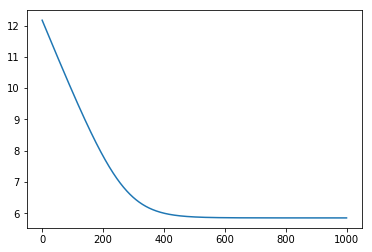

In [185]:
plt.plot([i for i in range(iteration)], np.log2(loss_list))

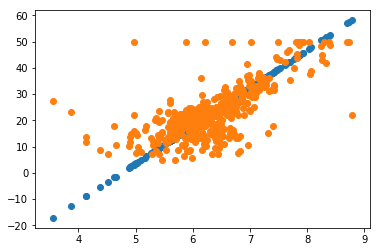

In [188]:
plt.scatter(x, price(x, k, b))
plt.scatter(x, y)

In [241]:
k

10.758409345497006

In [242]:
b

-45.19068386345864

In [243]:
loss(y, [price(x_i, k, b) for x_i in x])

44.964459043678744

In [287]:
% matplot inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

UsageError: Line magic function `%` not found.


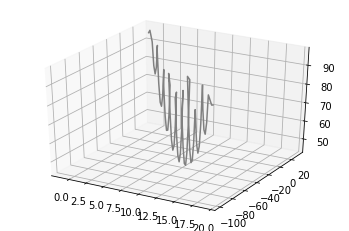

In [289]:
ax = plt.axes(projection='3d')
k = np.linspace(10 - 100, 10+ 100, 100)
b = np.linspace(-45 - 100, -45 + 100, 100)
k_b = [(k_i, b_i) for k_i in k for b_i in b]
xline = [k[0] for k in k_b]
yline = [b[1] for b in k_b]
zline = []
for k, b in k_b:
    zline.append(loss(y, [price(x_i, k, b) for x_i in x]))
line = [(a, b, c) for a, b, c in zip(xline, yline, zline)]
line = [el for el in line if el[2] < 100]
xline = [el[0] for el in line]
yline = [el[1] for el in line]
zline = [el[2] for el in line]
ax.plot3D(xline, yline, zline, 'gray')